In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
folder_name = 'gridsearch_results_subsample/one_model_True'

# Read in results.csv generated from gridsearch.ipynb
##### parameters: epochs per iteration, iterations in DSEA

In [3]:
df = pd.read_csv(f'{folder_name}/results.csv')
df.head(10)

,epochs,iterations,f_dsea,f_true,loss,acc,chi2
0,1,1,[0.17485247 0.16353483 0.14116895 0.11095212 0...,[0.146518 0.24642 0.223364 0.159558 0.099718 ...,[0.04547212],[0.304269],[0.10276137]
1,1,3,[0.20562752 0.20059535 0.16547301 0.13339389 0...,[0.146518 0.24642 0.223364 0.159558 0.099718 ...,[0.04365039 0.06623339 0.08949959],[0.306298 0.342934 0.353955],[0.08855548 0.043207 0.02512434]
2,1,6,[0.16956389 0.24355661 0.18487913 0.16186155 0...,[0.146518 0.24642 0.223364 0.159558 0.099718 ...,[0.04414035 0.07427677 0.10133233 0.12014341 0...,[0.292227 0.355084 0.364745 0.370096 0.372386 ...,[0.1206057 0.03103531 0.01575544 0.00849233 0...
3,1,8,[0.14079675 0.23795567 0.21965109 0.15849297 0...,[0.146518 0.24642 0.223364 0.159558 0.099718 ...,[0.04448928 0.07049078 0.0969658 0.11738586 0...,[0.273832 0.347813 0.364916 0.368917 0.373192 ...,[0.1132127 0.0375179 0.01588428 0.00872972 0...
4,1,10,[0.15235162 0.25083579 0.21554481 0.1663698 0...,[0.146518 0.24642 0.223364 0.159558 0.099718 ...,[0.04394033 0.07010446 0.09716853 0.12093335 0...,[0.303269 0.351884 0.362606 0.370717 0.373281 ...,[0.0858719 0.03314998 0.01643179 0.00816311 0...
5,1,12,[0.15678723 0.24363708 0.21401266 0.15772728 0...,[0.146518 0.24642 0.223364 0.159558 0.099718 ...,[0.04414579 0.06917133 0.09178987 0.11283345 0...,[0.309788 0.353191 0.362981 0.367303 0.374637 ...,[0.09032509 0.03281725 0.01755708 0.01124829 0...
6,1,16,[0.16604263 0.25413332 0.18456791 0.1679099 0...,[0.146518 0.24642 0.223364 0.159558 0.099718 ...,[0.04422272 0.07056283 0.09567453 0.11268269 0...,[0.300134 0.343134 0.356697 0.364163 0.36655 ...,[0.09725191 0.03944891 0.02095061 0.01235569 0...
7,1,20,[0.15473749 0.22094123 0.24846451 0.15172885 0...,[0.146518 0.24642 0.223364 0.159558 0.099718 ...,[0.04346831 0.0663019 0.08886881 0.10762373 0...,[0.294409 0.350603 0.357876 0.36745 0.366522 ...,[0.09500284 0.03839299 0.02305771 0.01272223 0...
8,5,1,[0.16883216 0.15974957 0.13469065 0.12142878 0...,[0.146518 0.24642 0.223364 0.159558 0.099718 ...,[0.04486775 0.04226941 0.04208902 0.04201093 0...,[0.300174 0.333832 0.337529 0.339711 0.340605],[0.11044493 0.07713971 0.07614421 0.07593336 0...
9,5,3,[0.18488633 0.21313936 0.17559059 0.1426893 0...,[0.146518 0.24642 0.223364 0.159558 0.099718 ...,[0.04545459 0.04235324 0.0421024 0.04202748 0...,[0.246279 0.322318 0.331615 0.334725 0.336865 ...,[0.16109319 0.08157539 0.0765023 0.07555448 0...


In [4]:
# drop epoch=5
ind_drop = np.where(df['epochs']==5)
df.drop(ind_drop[0], inplace=True)

# From Strings to numpy array

In [5]:
def str_to_np(string):
    string = string.replace('  ', ' ')
    string = string.replace('[', '')
    string = string.replace(']', '')
    
    return np.fromstring(string, sep=' ')

In [6]:
df['f_dsea_array'] = df['f_dsea'].apply(str_to_np)
df['f_true_array'] = df['f_true'].apply(str_to_np)
df['loss_array'] = df['loss'].apply(str_to_np)
df['acc_array'] = df['acc'].apply(str_to_np)
df['chi2_array'] = df['chi2'].apply(str_to_np)

In [7]:
df.drop(['f_dsea', 'f_true', 'loss', 'acc', 'chi2'], axis=1, inplace=True)
df.head(10)

,epochs,iterations,f_dsea_array,f_true_array,loss_array,acc_array,chi2_array
0,1,1,"[0.17485247, 0.16353483, 0.14116895, 0.1109521...","[0.146518, 0.24642, 0.223364, 0.159558, 0.0997...",[0.04547212],[0.304269],[0.10276137]
1,1,3,"[0.20562752, 0.20059535, 0.16547301, 0.1333938...","[0.146518, 0.24642, 0.223364, 0.159558, 0.0997...","[0.04365039, 0.06623339, 0.08949959]","[0.306298, 0.342934, 0.353955]","[0.08855548, 0.043207, 0.02512434]"
2,1,6,"[0.16956389, 0.24355661, 0.18487913, 0.1618615...","[0.146518, 0.24642, 0.223364, 0.159558, 0.0997...","[0.04414035, 0.07427677, 0.10133233, 0.1201434...","[0.292227, 0.355084, 0.364745, 0.370096, 0.372...","[0.1206057, 0.03103531, 0.01575544, 0.00849233..."
3,1,8,"[0.14079675, 0.23795567, 0.21965109, 0.1584929...","[0.146518, 0.24642, 0.223364, 0.159558, 0.0997...","[0.04448928, 0.07049078, 0.0969658, 0.11738586...","[0.273832, 0.347813, 0.364916, 0.368917, 0.373...","[0.1132127, 0.0375179, 0.01588428, 0.00872972,..."
4,1,10,"[0.15235162, 0.25083579, 0.21554481, 0.1663698...","[0.146518, 0.24642, 0.223364, 0.159558, 0.0997...","[0.04394033, 0.07010446, 0.09716853, 0.1209333...","[0.303269, 0.351884, 0.362606, 0.370717, 0.373...","[0.0858719, 0.03314998, 0.01643179, 0.00816311..."
5,1,12,"[0.15678723, 0.24363708, 0.21401266, 0.1577272...","[0.146518, 0.24642, 0.223364, 0.159558, 0.0997...","[0.04414579, 0.06917133, 0.09178987, 0.1128334...","[0.309788, 0.353191, 0.362981, 0.367303, 0.374...","[0.09032509, 0.03281725, 0.01755708, 0.0112482..."
6,1,16,"[0.16604263, 0.25413332, 0.18456791, 0.1679099...","[0.146518, 0.24642, 0.223364, 0.159558, 0.0997...","[0.04422272, 0.07056283, 0.09567453, 0.1126826...","[0.300134, 0.343134, 0.356697, 0.364163, 0.366...","[0.09725191, 0.03944891, 0.02095061, 0.0123556..."
7,1,20,"[0.15473749, 0.22094123, 0.24846451, 0.1517288...","[0.146518, 0.24642, 0.223364, 0.159558, 0.0997...","[0.04346831, 0.0663019, 0.08886881, 0.10762373...","[0.294409, 0.350603, 0.357876, 0.36745, 0.3665...","[0.09500284, 0.03839299, 0.02305771, 0.0127222..."
16,10,1,"[0.14531089, 0.16640814, 0.14742798, 0.1318981...","[0.146518, 0.24642, 0.223364, 0.159558, 0.0997...","[0.04398877, 0.04226347, 0.04213184, 0.0420404...","[0.290159, 0.33258, 0.336649, 0.33875, 0.33959...","[0.09294941, 0.07783513, 0.0764344, 0.0760466,..."
17,10,3,"[0.1945658, 0.19609881, 0.17669308, 0.14305787...","[0.146518, 0.24642, 0.223364, 0.159558, 0.0997...","[0.04381858, 0.0422817, 0.04212718, 0.04204567...","[0.30721, 0.330253, 0.335653, 0.337343, 0.3392...","[0.08525158, 0.07688009, 0.07580052, 0.0757450..."


# Distances between predicted and true distribution (MAE, MSE, CHI2)

In [8]:
df['dif'] = df['f_dsea_array']-df['f_true_array']

## Mean Absolute Error (MAE)
$$
\Large
MAE = \frac{1}{n} \sum_{i=1}^{n} |\hat{y}_i - y_i| \\
\text{with } y_i \text{: True value and } \hat{y}_i \text{: Predicted value}
$$




In [9]:
# mean absolute error
df['MAE'] = df['dif'].apply(lambda x: np.sum(np.abs(x))/len(x))

## Root Mean Quare Error (RMSE)
$$
\Large RMSE = \sqrt{\frac{\sum_{i=1}^{n} (\hat{y}_i - y_i)^2}{n}}
$$

In [10]:
# root mean square error
df['RMSE'] = df['dif'].apply(lambda x: np.sqrt(np.sum(x**2)/len(x)))

## Chi-square distance (chi2)
$$
\Large \chi^2 = \frac{1}{2} \sum_{i=1}^{n} \frac{(\hat{y}_i - y_i)^2}{\hat{y}_i + y_i}
$$

In [11]:
def chi2(df_true, df_pred):
    num = (df_true - df_pred)**2
    den = df_true + df_pred
    return 1/2 * np.sum(num/den)

df['chi2'] = df.apply(lambda x: chi2(x['f_true_array'], x['f_dsea_array']), axis=1)

In [12]:
# number of epoch/iteration sorted by chi2 distance
display(HTML(df[['epochs', 'iterations', 'MAE','RMSE', 'chi2']].sort_values(by='chi2').to_html(index=False)))

epochs,iterations,MAE,RMSE,chi2
60,16,0.002783,0.003282,0.000293
50,16,0.003370,0.004092,0.000439
10,12,0.003388,0.005303,0.000518
100,16,0.004766,0.006286,0.000686
25,16,0.003923,0.005821,0.000688
75,8,0.004382,0.005655,0.000694
25,10,0.004594,0.005927,0.000698
1,10,0.004607,0.005558,0.000757
25,20,0.003925,0.005384,0.000779
85,10,0.004638,0.005869,0.000780


In [13]:
# difference between the errors: iterations
df.sort_values(by='MAE')['iterations'].to_numpy(), df.sort_values(by='RMSE')['iterations'].to_numpy(), df.sort_values(by='chi2')['iterations'].to_numpy()

(array([16, 12, 16, 12,  8, 20, 16, 20,  8, 16, 12, 10, 10, 10, 10, 10, 16,
        10,  8, 10, 20, 12, 12,  8,  8, 10, 12,  8, 20, 16, 20, 20, 16, 12,
        10, 20,  8,  6, 20,  6, 12, 20,  8,  6,  8,  6,  6, 12,  6, 16,  6,
         6, 16,  6,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  1,  1,  1]),
 array([16, 16, 12,  8, 20, 12, 12, 20, 10,  8, 16, 10, 10, 16, 16, 10, 10,
        10, 12,  8, 12, 10, 20, 16,  8, 10,  8, 20,  8, 20, 20, 12, 10, 20,
        16,  8,  6,  8,  8, 20, 12, 12,  6,  6,  6, 20,  6, 12,  6, 16,  6,
         6, 16,  6,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  1,  1,  1]),
 array([16, 16, 12, 16, 16,  8, 10, 10, 20, 10, 10, 10, 12, 10,  8, 20,  8,
        12, 10, 16,  8,  8, 12,  8, 12, 16, 20, 10, 16,  8, 20, 10, 20,  8,
        12, 20,  8, 12, 20, 20, 12,  6, 12,  6,  6, 20,  6,  6,  6,  6,  6,
        16,  6, 16,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  1,  1,  1]))

In [14]:
# difference between the errors: epochs
df.sort_values(by='MAE')['epochs'].to_numpy(), df.sort_values(by='RMSE')['epochs'].to_numpy(), df.sort_values(by='chi2')['epochs'].to_numpy()

(array([ 60,  50,  50,  10,   1,  75,  25,  25,  75,  75,   1,  25,  75,
          1,  85,  10, 100,  50,  35,  60,  60,  75, 100, 100,  10, 100,
         85,  60,  85,  85,  10, 100,  10,  35,  35,  50,  85,  25,  35,
         60,  60,   1,  25,  50,  50,   1,  85,  25, 100,   1,  75,  10,
         35,  35,  75, 100,  85,  50,  60,  25,  35,  10,   1,  10,  50,
         60,  85,  35,  75,   1, 100,  25]),
 array([ 60,  50,  50,   1,  75,  10,   1,  25,   1,  75,  25,  85,  25,
         75, 100,  60,  50,  75,  75,  35, 100, 100,  60,  85,  10,  10,
         60,  85, 100, 100,  10,  85,  35,  50,  10,  25,  85,  85,  50,
         35,  25,  35,  25,  50, 100,   1,  60,  60,  75,  35,   1,  10,
          1,  35,  75, 100,  85,  60,  50,  25,  35,  10,   1,  50,  10,
         60,  85,  35,  75,   1, 100,  25]),
 array([ 60,  50,  10, 100,  25,  75,  25,   1,  25,  85,  50,  10,  75,
         60,   1,  75,  35,  50,  75,  75,  10,  60,   1, 100, 100,  85,
        100, 100,  10,  85,  60,  

# Visualization of the gridsearch

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

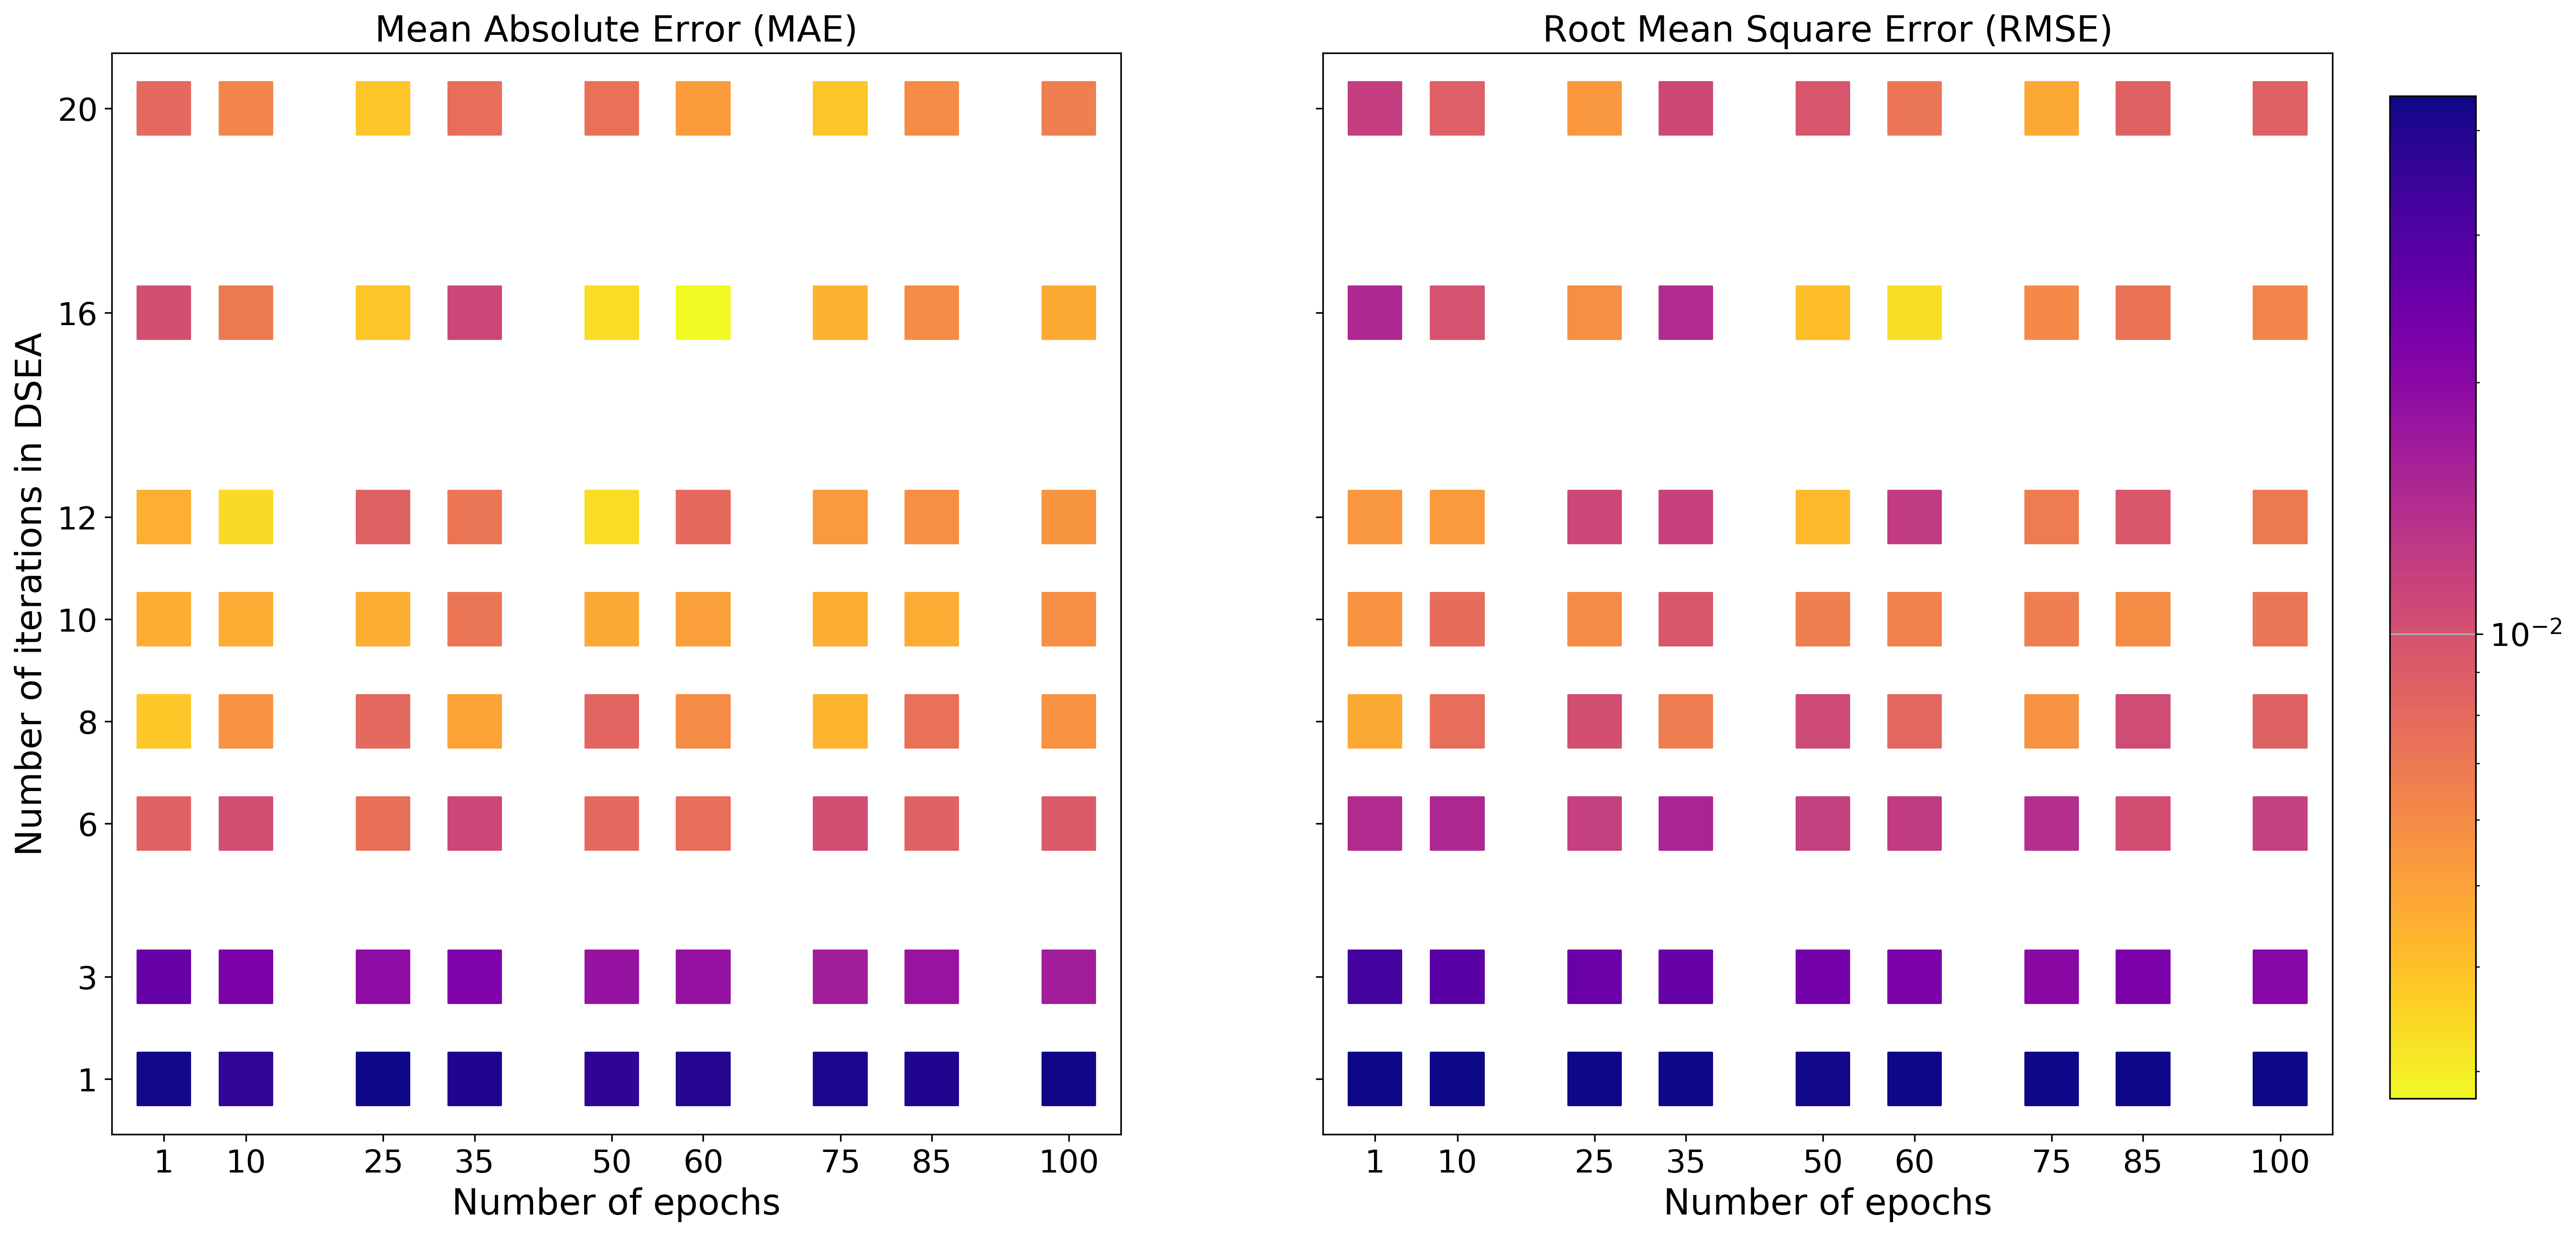

In [15]:
plt.set_cmap('plasma_r')
fig = plt.figure()
fig.tight_layout()
fig, axs = plt.subplots(1,2, figsize=(20,10), sharey=True, sharex=True, dpi=300)
norm=matplotlib.colors.LogNorm()#plt.Normalize()

# MAE plot
sc = axs[0].scatter(x=df['epochs'], y=df['iterations'], c=df['MAE'], norm=norm, marker='s', s=700)
axs[0].set_xlabel('Number of epochs', fontsize=18)
#axs[0].set_xscale('log')
axs[0].set_xticks([1, 10, 25, 35, 50, 60, 75, 85, 100])
plt.setp(axs[0].get_xticklabels(), fontsize=16)
axs[0].set_ylabel('Number of iterations in DSEA', fontsize=18)
axs[0].set_yticks([1,3,6,8,10,12,16,20])
plt.setp(axs[0].get_yticklabels(), fontsize=16)
axs[0].set_title('Mean Absolute Error (MAE)', fontsize=18)

# RMSE plot
axs[1].scatter(x=df['epochs'], y=df['iterations'], c=df['RMSE'], norm=norm, marker='s', s=700)
axs[1].set_xlabel('Number of epochs', fontsize=18)
plt.setp(axs[1].get_xticklabels(), fontsize=16)
axs[1].set_title('Root Mean Square Error (RMSE)', fontsize=18)

#colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.ax.tick_params(labelsize=16)
#cb.ax.set_yticklabels(['    0.002', '    0.003', '    0.004', '    0.005', '    0.006', '    0.007', '    0.008', '> 0.009'])#([0.0026, 0.044])
plt.grid()

fig.savefig(f'{folder_name}/scatter_mae_mse.pdf', dpi=300)
fig.savefig(f'{folder_name}/scatter_mae_mse.png', dpi=300)

fig.show()

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

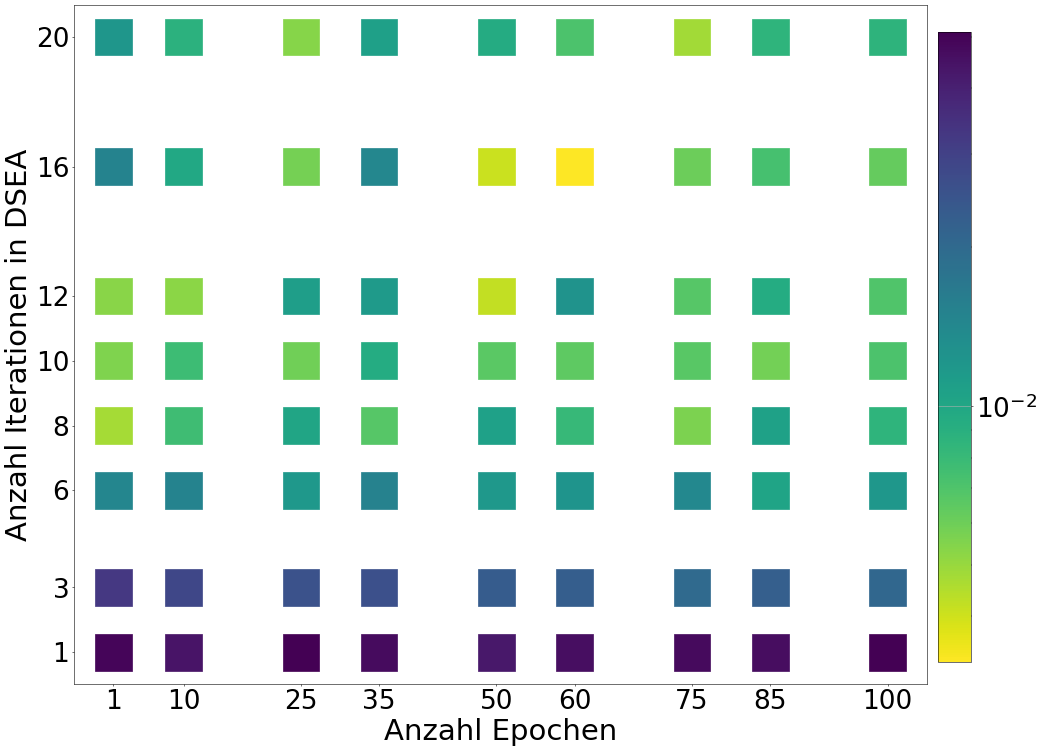

In [16]:
plt.set_cmap('viridis_r') #plasma_r
fig = plt.figure()
fig.tight_layout()
fig, axs = plt.subplots(1,1, figsize=(22,18), sharey=True, sharex=True, dpi=50)
norm=matplotlib.colors.LogNorm()#plt.Normalize(df['chi2'].min(),df['chi2'].max()) #None#

# chi2 plot
sc = axs.scatter(x=df['epochs'], y=df['iterations'], c=df['RMSE'], norm=norm, marker='s', s=2800)
axs.set_xlabel('Anzahl Epochen', fontsize=42)
axs.set_xticks([1, 10, 25, 35, 50, 60, 75, 85, 100])
plt.setp(axs.get_xticklabels(), fontsize=38)
axs.set_ylabel('Anzahl Iterationen in DSEA', fontsize=42)
axs.set_yticks([1,3,6,8,10,12,16,20])
plt.setp(axs.get_yticklabels(), fontsize=38)
#axs.set_title('Chi-square distance', fontsize=30)

#colorbar
cbar_ax = fig.add_axes([0.91, 0.15, 0.03, 0.7])
cb = fig.colorbar(sc, cax=cbar_ax)
#cb.ax.set_yticklabels(['    0.0003', '    0.0004', '    0.0005', '    0.0006', '    0.0007', '    0.0008', '    0.0009', '> 0.0010'])#([0.0026, 0.044])
cb.ax.tick_params(labelsize=38)
#sc.figure.axes[1].tick_params(axis="y", labelsize=32)

plt.grid()

fig.savefig(f'{folder_name}/scatter_rmse.pdf')
fig.savefig(f'{folder_name}/scatter_rmse.png', dpi=300)
fig.show()

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

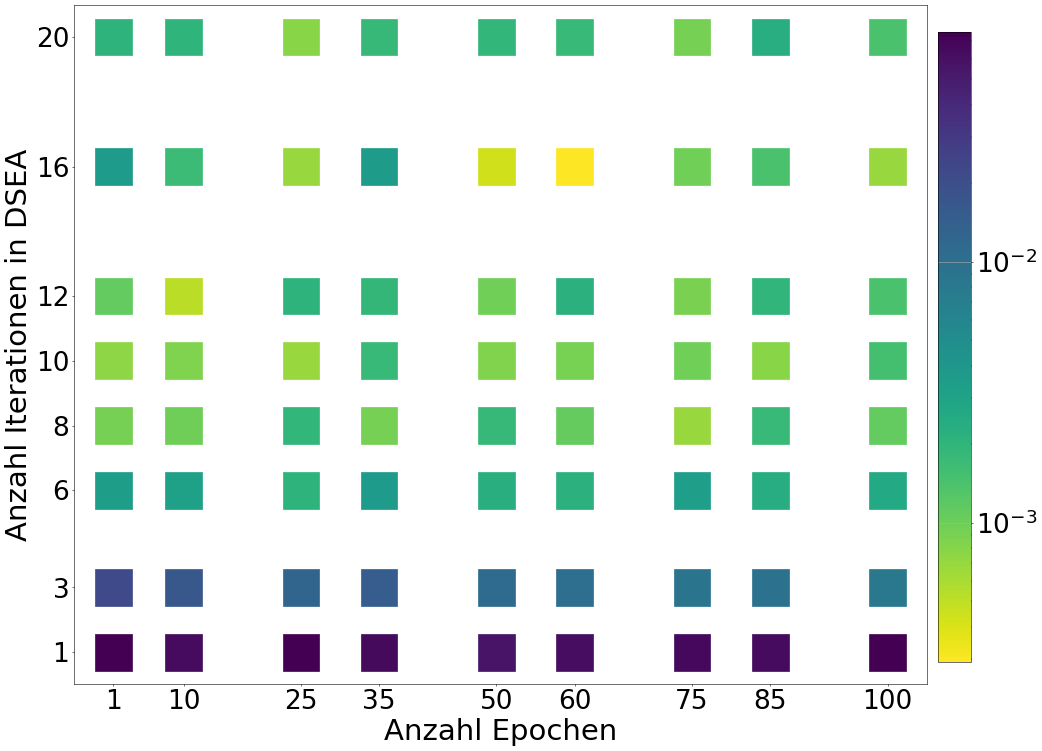

In [17]:
plt.set_cmap('viridis_r') #plasma_r
fig = plt.figure()
fig.tight_layout()
fig, axs = plt.subplots(1,1, figsize=(22,18), sharey=True, sharex=True, dpi=50)
norm=matplotlib.colors.LogNorm()#plt.Normalize(df['chi2'].min(),df['chi2'].max()) #None#

# chi2 plot
sc = axs.scatter(x=df['epochs'], y=df['iterations'], c=df['chi2'], norm=norm, marker='s', s=2800)
axs.set_xlabel('Anzahl Epochen', fontsize=42)
axs.set_xticks([1, 10, 25, 35, 50, 60, 75, 85, 100])
plt.setp(axs.get_xticklabels(), fontsize=38)
axs.set_ylabel('Anzahl Iterationen in DSEA', fontsize=42)
axs.set_yticks([1,3,6,8,10,12,16,20])
plt.setp(axs.get_yticklabels(), fontsize=38)
#axs.set_title('Chi-square distance', fontsize=30)

#colorbar
cbar_ax = fig.add_axes([0.91, 0.15, 0.03, 0.7])
cb = fig.colorbar(sc, cax=cbar_ax)
#cb.ax.set_yticklabels(['    0.0003', '    0.0004', '    0.0005', '    0.0006', '    0.0007', '    0.0008', '    0.0009', '> 0.0010'])#([0.0026, 0.044])
cb.ax.tick_params(labelsize=38)
#sc.figure.axes[1].tick_params(axis="y", labelsize=32)

plt.grid()

fig.savefig(f'{folder_name}/scatter_chi2.pdf', dpi=300)
fig.savefig(f'{folder_name}/scatter_chi2.png', dpi=300)
fig.show()

# Model History of the best model

In [18]:
# best model
Nepoch=60
Niter=16

In [19]:
ind = df.index[(df['epochs']==Nepoch) & (df['iterations']==Niter)][0]
ind

70

In [20]:
loss_hist = df['loss_array'][ind]
acc_hist = df['acc_array'][ind]
chi2_hist = df['chi2_array'][ind]

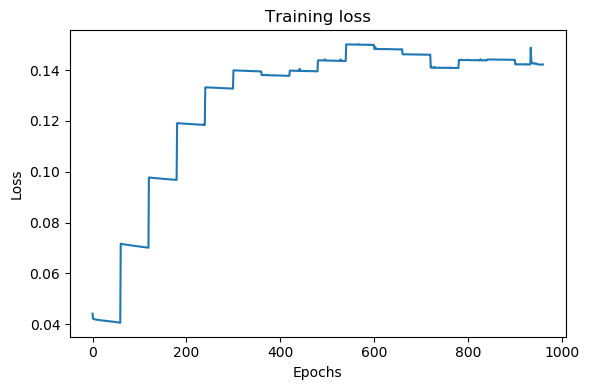

In [21]:
plt.figure(figsize=(6,4), dpi=100)
plt.plot(loss_hist)
#plt.plot(history.history['val_loss'])
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.savefig(f'{folder_name}/loss.pdf', dpi=300)
plt.savefig(f'{folder_name}/loss.png', dpi=300)

plt.show()

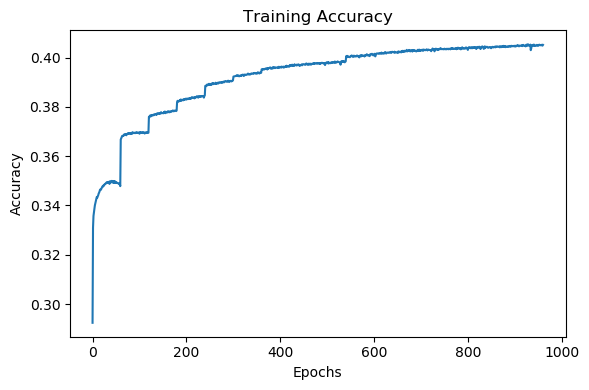

In [22]:
plt.figure(figsize=(6,4), dpi=100)
plt.plot(acc_hist)
#plt.plot(history.history['val_loss'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.savefig(f'{folder_name}/acc.pdf', dpi=300)
plt.savefig(f'{folder_name}/acc.png', dpi=300)

plt.show()

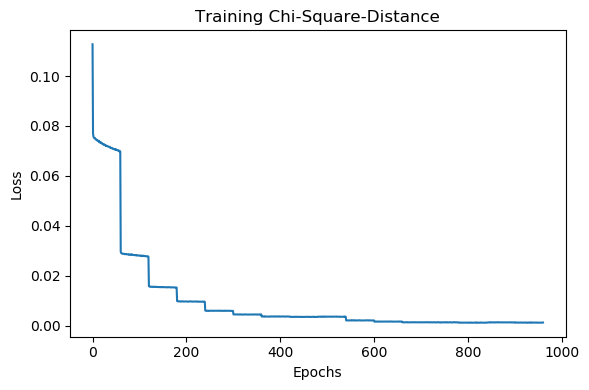

In [23]:
plt.figure(figsize=(6,4), dpi=100)
plt.plot(chi2_hist)
#plt.plot(history.history['val_loss'])
plt.title('Training Chi-Square-Distance')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
#plt.savefig(f'{folder_name}/chi2.pdf', dpi=300)
#plt.savefig(f'{folder_name}/chi2.png', dpi=300)

plt.show()

# Energy spectrum of the best model

In [24]:
f_true = df['f_true_array'][ind]
f_dsea = df['f_dsea_array'][ind]

In [25]:
# Variables
lower_limit = 100
upper_limit = 10**5
num_bins = 10

In [26]:
bins = np.logspace(np.log10(lower_limit), np.log10(upper_limit), num_bins+1)
bin_centers = np.array([(bins[i] + (bins[i+1]-bins[i])/2) for i in range(len(bins)-1)])
bin_width = np.array([bins[i+1]-bins[i] for i in range(num_bins)])

In [27]:
bins, bin_centers, bin_width

(array([   100.        ,    199.5262315 ,    398.10717055,    794.32823472,
          1584.89319246,   3162.27766017,   6309.5734448 ,  12589.25411794,
         25118.8643151 ,  50118.72336273, 100000.        ]),
 array([  149.76311575,   298.81670103,   596.21770264,  1189.61071359,
         2373.58542631,  4735.92555249,  9449.41378137, 18854.05921652,
        37618.79383891, 75059.36168136]),
 array([   99.5262315 ,   198.58093906,   396.22106417,   790.56495774,
         1577.38446771,  3147.29578463,  6279.68067314, 12529.61019715,
        24999.85904763, 49881.27663727]))

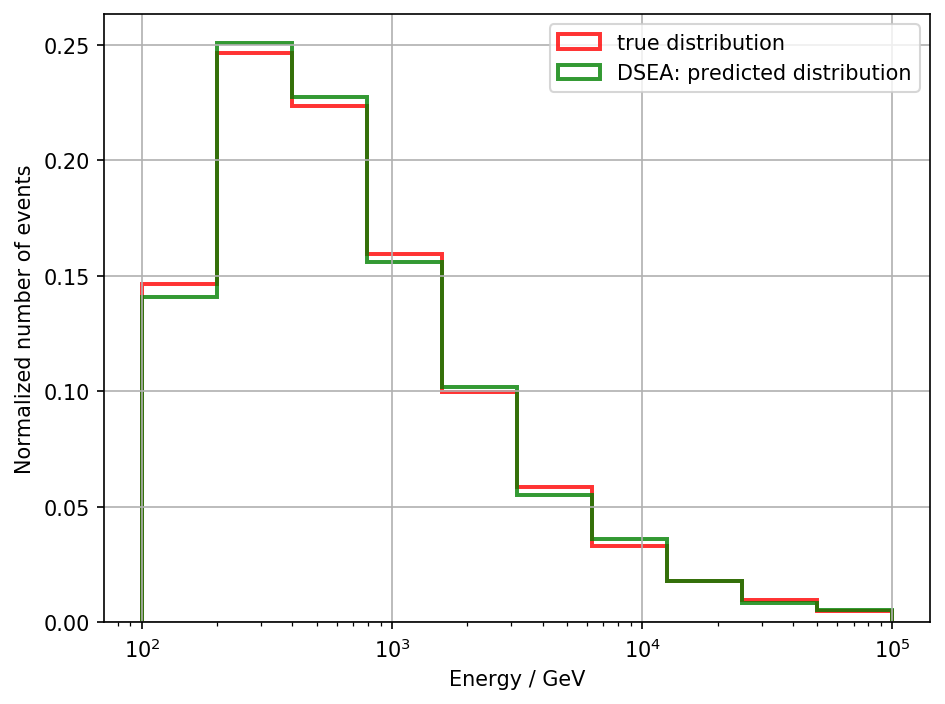

In [28]:
fig1, ax1 = plt.subplots(figsize=(6.4,4.8),dpi=150) #figsize=(10, 6)
ax1.hist(bin_centers, bins=bins, weights=f_true, alpha=0.8, color='red', histtype='step', linewidth=1.9, label='true distribution')
ax1.hist(bin_centers, bins=bins, weights=f_dsea, alpha=0.8, color='green', histtype='step', linewidth=1.9, label='DSEA: predicted distribution')


#ax1.hist(y_pred_sum_energy, bins=bins, alpha=0.8, color='royalblue', histtype='step', linewidth=1.4, label='predicted_sum')
#ax1.hist(y_pred_energy, bins=bins, alpha=0.8, color='green', histtype='step', linewidth=1.4, label='predicted_max')

ax1.set_xscale('log')
#ax1.set_xticks(bin_centers)
#ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_xlabel(r'Energy / GeV')

ax1.set_ylabel('Normalized number of events')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(f'{folder_name}/spectrum_best_model.pdf', dpi=300)
plt.savefig(f'{folder_name}/spectrum_best_model.png', dpi=300)
plt.show()

In [29]:
f_err= None#np.sqrt(np.vstack([f_dsea*, f_dsea]))

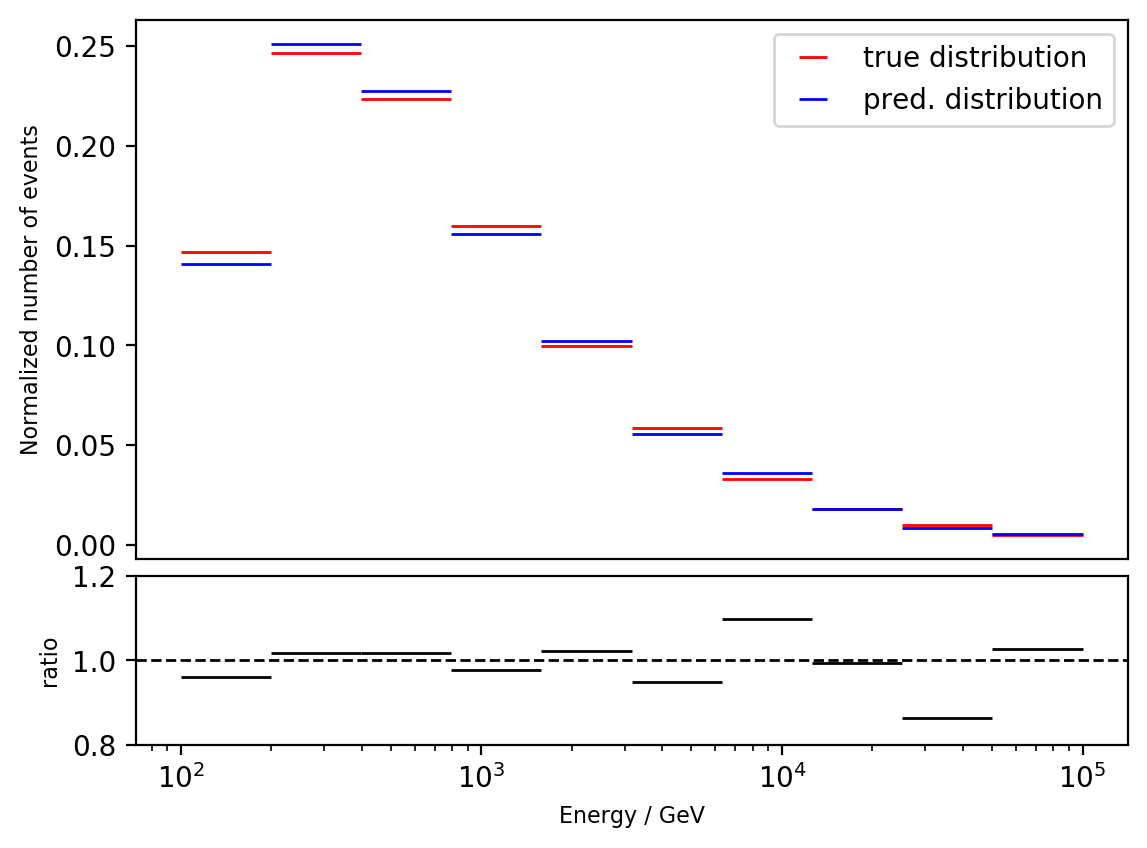

In [30]:
fig = plt.figure(figsize=(6.4,4.8),dpi=200) #dpi 300 for full hd
fig.tight_layout()

# seperation DSEA plot and ratio
gs = matplotlib.gridspec.GridSpec(4, 1)
axes1 = fig.add_subplot(gs[:-1])
axes2 = fig.add_subplot(gs[-1], sharex=axes1)
fig.subplots_adjust(hspace = .1) #0.001

# spectrum
axes1.errorbar(bin_centers, f_true, fmt=' ', color='red', xerr=bin_width/2, elinewidth=1, label='true distribution') #true distr
axes1.errorbar(bin_centers, f_dsea, fmt=' ', color='blue', xerr=bin_width/2, yerr=f_err, elinewidth=1, label='pred. distribution') #pred. distr
axes1.set_xscale('log')
axes1.set_xticks([],[])
axes1.set_ylabel('Normalized number of events', fontsize=8)


# ratio
axes2.errorbar(bin_centers, f_dsea/f_true, fmt=' ', color='black', xerr=bin_width/2, elinewidth=1)
axes2.axhline(1, color='k', linestyle='--', linewidth=1)
axes2.set_xscale('log')
axes2.set_xlabel(r'Energy / GeV', fontsize=8)
axes2.set_yticks([0.8,1.0,1.2])
axes2.set_ylabel('ratio', fontsize=8)

# disable xticks in top plot
axes1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

axes1.legend()

plt.savefig(f'{folder_name}/spectrum_best_model_error.pdf', dpi=300)
plt.savefig(f'{folder_name}/spectrum_best_model_error.png', dpi=300)
plt.show()